In [1]:
#Agency Spending Notebook
import requests
import json
import numpy as np
import pandas as pd
import zipfile as z
import matplotlib.pyplot as plt

In [2]:
#add the directories to a list for later on
#zip_directories = ['2014_Contracts.zip', '2016_Contracts.zip', '2018_Contracts.zip']

#gets files from from zipfiles
spending_18_folder = z.ZipFile('2018_Contracts.zip', 'r')

#spending_folders = [spending_14_folder, spending_16_folder, spending_18_folder]

In [3]:
spending_18_list = []
spending_18_csv_list = []
counter = 0

with spending_18_folder:
    files = spending_18_folder.namelist()
    for file in files:
        spending_18_list.append(spending_18_folder.open(file))
    for n in range(0,len(spending_18_list)):
        current_18_csv = pd.read_csv(spending_18_list[0])
        del spending_18_list[0]
        spending_18_csv = current_18_csv[['awarding_agency_name','funding_agency_name', 'recipient_state_code', 'recipient_state_name', 'primary_place_of_performance_state_code', 'total_dollars_obligated', 'current_total_value_of_award','potential_total_value_of_award']].dropna()
        spending_18_csv_list.append(spending_18_csv)
        
spending_18_clean = pd.concat(spending_18_csv_list)
del spending_18_csv_list

C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,7,8,21,39,49,55,56,63,73,95,115,116,117,118,144,146,147,148,149,150,153,154,155,156,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,7,8,21,39,42,49,53,55,56,63,95,115,116,117,118,144,146,147,148,149,150,153,154,155,156,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jake\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,5,6,7,8,21,34,35,39,42,49,53,55,56,63,77,78,79,81,82,83,95,111,112,115,116,117,118,119,120,144,146,147,148,149,150,153,154,155,156,167,168,264,266,268,270,272) have mixed types. Specify dtype option on import or

In [8]:
spending_18_clean.head()
spending_18_states_grouped = spending_18_clean.groupby(["recipient_state_code", "funding_agency_name"]).sum()
spending_18_states_grouped.head()

total_dollars_obligated  \
recipient_state_code funding_agency_name                                                     
AK                   AGENCY FOR INTERNATIONAL DEVELOPMENT (USAID)             1.360395e+08   
                     BROADCASTING BOARD OF GOVERNORS (BBG)                    1.599926e+06   
                     CONSUMER FINANCIAL PROTECTION BUREAU (CFPB)              1.322360e+04   
                     CONSUMER PRODUCT SAFETY COMMISSION (CPSC)                7.250000e+03   
                     CORPS OF ENGINEERS - CIVIL WORKS (USACE)                 3.239898e+08   

                                                                   current_total_value_of_award  \
recipient_state_code funding_agency_name                                                          
AK                   AGENCY FOR INTERNATIONAL DEVELOPMENT (USAID)                  3.016426e+08   
                     BROADCASTING BOARD OF GOVERNORS (BBG)                         1.599926e+06   
                     CONSUMER FINANCIAL PROTECTION BUREAU (CFPB)                   1.322360e+04   
                     CONSUMER PRODUCT SAFETY COMMISSION (CPSC)                     7.250000e+03   
                     CORPS OF ENGINEERS - CIVIL WORKS (USACE)                      3.269454e+08   

                                                                   potential_total_value_of_award  
recipient_state_code funding_agency_name                                                           
AK                   AGENCY FOR INTERNATIONAL DEVELOPMENT (USAID)                    4.782579e+08  
                     BROADCASTING BOARD OF GOVERNORS (BBG)                           1.599926e+06  
                     CONSUMER FINANCIAL PROTECTION BUREAU (CFPB)                     6.611800e+04  
                     CONSUMER PRODUCT SAFETY COMMISSION (CPSC)                       1.265000e+04  
                     CORPS OF ENGINEERS - CIVIL WORKS (USACE)                        3.467538e+08

<function matplotlib.pyplot.show(*args, **kw)>

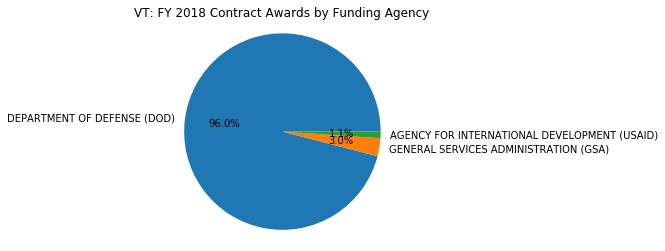

In [22]:
vt_18 = spending_18_clean.loc[spending_18_clean["recipient_state_code"] == "VT"]
vt_18_no_dod = vt_18#.loc[vt_18['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
vt_18_agency = vt_18_no_dod.groupby('funding_agency_name').sum()
vt_18_agency = vt_18_agency.reset_index()
vt_18_agency = vt_18_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_6_18 = vt_18_agency.head(3)
plt.pie(top_6_18['total_dollars_obligated'], labels = [value for value in top_6_18['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("VT: FY 2018 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

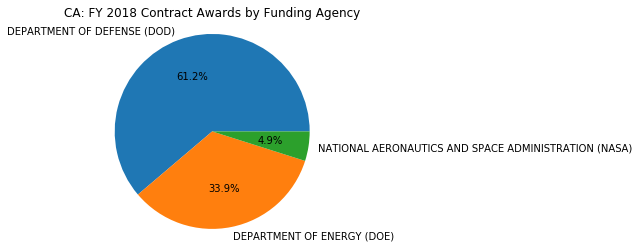

In [23]:
ca_18 = spending_18_clean.loc[spending_18_clean["recipient_state_code"] == "CA"]
ca_18_no_dod = ca_18#.loc[ca_18['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
ca_18_agency = ca_18_no_dod.groupby('funding_agency_name').sum()
ca_18_agency = ca_18_agency.reset_index()
ca_18_agency = ca_18_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_ca_6_18 = ca_18_agency.head(3)
plt.pie(top_ca_6_18['total_dollars_obligated'], labels = [value for value in top_ca_6_18['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("CA: FY 2018 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

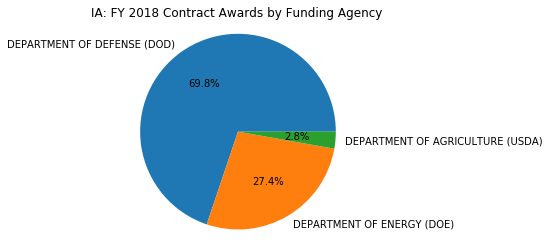

In [24]:
ia_18 = spending_18_clean.loc[spending_18_clean["recipient_state_code"] == "IA"]
ia_18_no_dod = ia_18#.loc[ia_18['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
ia_18_agency = ia_18_no_dod.groupby('funding_agency_name').sum()
ia_18_agency = ia_18_agency.reset_index()
ia_18_agency = ia_18_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_ia_6_18 = ia_18_agency.head(3)
plt.pie(top_ia_6_18['total_dollars_obligated'], labels = [value for value in top_ia_6_18['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("IA: FY 2018 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

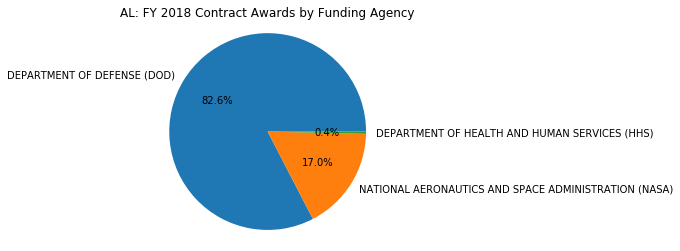

In [25]:
al_18 = spending_18_clean.loc[spending_18_clean["recipient_state_code"] == "AL"]
al_18_no_dod = al_18#.loc[al_18['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
al_18_agency = al_18_no_dod.groupby('funding_agency_name').sum()
al_18_agency = al_18_agency.reset_index()
al_18_agency = al_18_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_al_6_18 = al_18_agency.head(3)
plt.pie(top_al_6_18['total_dollars_obligated'], labels = [value for value in top_al_6_18['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("AL: FY 2018 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

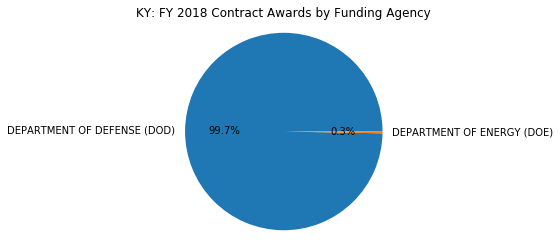

In [29]:
ky_18 = spending_18_clean.loc[spending_18_clean["recipient_state_code"] == "KY"]
ky_18_no_dod = ky_18#.loc[ky_18['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
ky_18_agency = ky_18_no_dod.groupby('funding_agency_name').sum()
ky_18_agency = ky_18_agency.reset_index()
ky_18_agency = ky_18_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_ky_6_18 = ky_18_agency.head(2)
plt.pie(top_ky_6_18['total_dollars_obligated'], labels = [value for value in top_ky_6_18['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("KY: FY 2018 Contract Awards by Funding Agency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

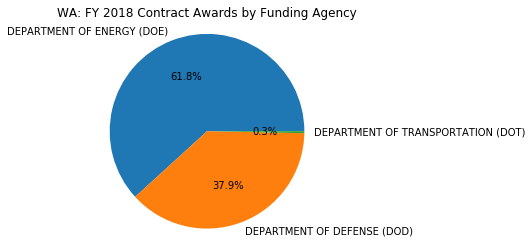

In [30]:
wa_18 = spending_18_clean.loc[spending_18_clean["recipient_state_code"] == "WA"]
wa_18_no_dod = wa_18#.loc[wa_18['funding_agency_name'] != "DEPARTMENT OF DEFENSE (DOD)"]
wa_18_agency = wa_18_no_dod.groupby('funding_agency_name').sum()
wa_18_agency = wa_18_agency.reset_index()
wa_18_agency = wa_18_agency.sort_values(['total_dollars_obligated'], ascending = False)
top_wa_6_18 = wa_18_agency.head(3)
plt.pie(top_wa_6_18['total_dollars_obligated'], labels = [value for value in top_wa_6_18['funding_agency_name']], autopct='%1.1f%%')
plt.axis('equal')
plt.title("WA: FY 2018 Contract Awards by Funding Agency")
plt.show